In [1]:
import cmocean.cm as cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def make_results_model(fall_file, winter_file, spring_file, summer_file):
    results_fall = pd.read_csv(fall_file)
    results_fall['season'] = 'fall'
    results_winter = pd.read_csv(winter_file)
    results_winter['season'] = 'winter'
    results_spring = pd.read_csv(spring_file)
    results_spring['season'] = 'spring'
    results_summer = pd.read_csv(summer_file)
    results_summer['season'] = 'summer'

    results_all = pd.concat([results_fall, results_winter, results_spring, results_summer], ignore_index=True)
    results_all = results_all.rename(columns={'Unnamed: 0': 'model'})
    results_201905R = results_all[results_all['model'] == '201905R']
    results_202111 = results_all[results_all['model'] == '202111']
    return results_201905R, results_202111

In [3]:
def bar_chart(results_201905R, results_202111, categories, prod_region):
    results_201905R_r = results_201905R[results_201905R['region'] == prod_region]
    results_202111_r = results_202111[results_202111['region'] == prod_region]

    fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=True)
    fig.suptitle('{} region metric by season'.format(prod_region))

    bar_width = 0.2
    x = np.arange(len(categories))

    ax[0].set_title('model v201905R')
    ax[0].grid(axis='y', zorder=0)
    ax[0].bar(x - 1.5 * bar_width, results_201905R[results_201905R['season'] == 'winter'][categories].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[0].bar(x - 0.5 * bar_width, results_201905R[results_201905R['season'] == 'spring'][categories].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[0].bar(x + 0.5 * bar_width, results_201905R[results_201905R['season'] == 'summer'][categories].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[0].bar(x + 1.5 * bar_width, results_201905R[results_201905R['season'] == 'fall'][categories].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)
    ax[0].set_xticks(x, categories)
    ax[0].legend(loc='upper right')

    ax[1].set_title('model v202111')
    ax[1].grid(axis='y', zorder=0)
    ax[1].bar(x - 1.5 * bar_width, results_202111[results_202111['season'] == 'winter'][categories].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
    ax[1].bar(x - 0.5 * bar_width, results_202111[results_202111['season'] == 'spring'][categories].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
    ax[1].bar(x + 0.5 * bar_width, results_202111[results_202111['season'] == 'summer'][categories].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
    ax[1].bar(x + 1.5 * bar_width, results_202111[results_202111['season'] == 'fall'][categories].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)

In [4]:
results_201905R, results_202111 = make_results_model('results_0_30_fall_noferry.csv', 'results_0_30_winter_noferry.csv', 'results_0_30_spring_noferry.csv', 'results_0_30_summer_noferry.csv')
results_model_bar = results_201905R[['season', 'rmse', 'crmse', 'swillmott', 'systematic', 'nonsystematic', 'spread']]
categories = results_model_bar.loc[:, results_model_bar.columns != 'season'].columns.to_list()
categories

['rmse', 'crmse', 'swillmott', 'systematic', 'nonsystematic', 'spread']

In [5]:
prod_region = 'Nooksack'

color1 = '#4f8cf0'
color2 = '#162845'
color3 = '#345d9e'

color_spring = '#7ABB00'
color_summer = '#FFBF00'
color_fall = '#FF6F00'
color_winter = '#00C6C9'

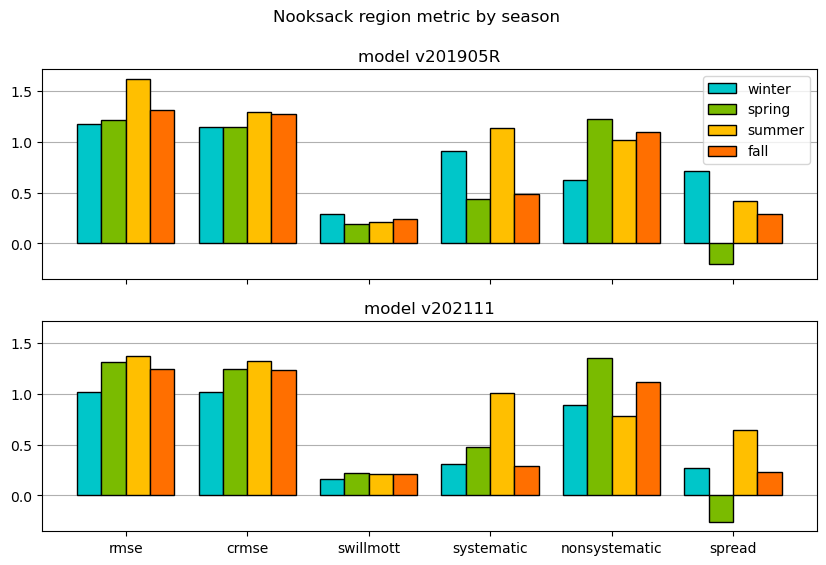

In [6]:
bar_chart(results_201905R, results_202111, categories, 'Nooksack')